In [58]:
import numpy as np 
from numpy.random import rand
import matplotlib.pyplot as plt

#Parameters
ctrc = 0.005
ctrd = 0.167
cmloss = np.log(2)/120
cploss = np.log(2)/3600
steps = 50000

#Initial Values
tautime = 0
mRNA = 0
Protein = 0
DNA = 1       

#Outputsave
parr = np.zeros([1,steps])
rnarr = np.zeros([1,steps])
tarr = np.zeros([1,steps])
a_j = [0 for i in range(6)]

#counter
counter = 1

while counter < steps:
    #Propensities
    a_j[0] = ctrc * DNA
    a_j[1] = ctrd * mRNA
    a_j[2] = cmloss * mRNA
    a_j[3] = cploss * Protein

    #a total
    a_total = np.sum(a_j)

    #Tau
    tau = (1/a_total)*np.log(1/rand())
    tautime += tau

    #q
    dart = a_total * rand()
    sum_a = 0
    q = 0
    
    for i in range(len(a_j)):
        sum_a += a_j[i]
        if sum_a > dart:
            q = i + 1
            break

    if q == 1:
        mRNA += 1
    elif q == 2:
        Protein += 1
    elif q == 3:
        mRNA -= 1
    elif q == 4:
        Protein -= 1
    
    rnarr[0,counter] = mRNA
    parr[0,counter] = Protein
    tarr[0,counter] = tautime
    counter += 1



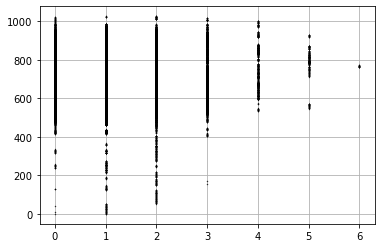

In [59]:
plt.plot(rnarr[0],parr[0],'ko',ms=0.4)
plt.grid()
 

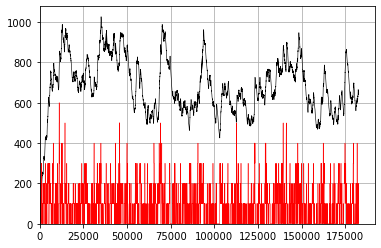

In [61]:
plt.plot(tarr[0],parr[0],'k',ms=0.1, linewidth=0.6)
plt.plot(tarr[0],rnarr[0]*100,'r',ms=0.1,linewidth=0.5)
plt.xlim(0)
plt.ylim(0)
plt.grid()